In [81]:
import sys
sys.path.insert(1, '/home/thomas/research/projects/a549_40x/src/3-compute/tools/')

import warnings
warnings.filterwarnings("ignore")

import glob
import pickle
from traj_class import single_cell_traj,fluor_single_cell_traj
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
from os.path import basename

from scipy.interpolate import interp1d
from tslearn.metrics import dtw_path

plot extracted ict and filter out undesired

In [82]:
dataset='02-03-22_72hr_no-treat'
traj_folder='ict-auto-02'

main_path='/home/thomas/research/projects/a549_40x/data/'
output_path=main_path+'out/pcna/'+dataset+'/'
sct_path=output_path+'traj/'+traj_folder+'/'
sct_list=sorted(glob.glob(sct_path+'*'))
print(len(sct_list))

1


quick plot of mean intensity

In [83]:
# banish_traj = [1,2,3,4,5] # 12-19-21
# banish_traj = [0,1,3,4] # 01-27-22
banish_traj = []
all_traj_zero_init_time = []
all_traj_pcna_mean_int = []
for sct_idx in range(len(sct_list)):
        if sct_idx not in banish_traj:
                print('accepted: '+os.path.basename(sct_list[sct_idx]))
                sct_path = sct_list[sct_idx]
                with open (sct_path, 'rb') as fp:
                        sct = pickle.load(fp)
                sct_zero_init_time = sct.traj_seri[:,0]-np.min(sct.traj_seri[:,0])   # decreases initial time to 0
                sct_mean_int = sct.traj_pcna_feature_values[0]
                all_traj_zero_init_time.append(sct_zero_init_time)
                all_traj_pcna_mean_int.append(sct_mean_int)
        else:
                print('banished: '+os.path.basename(sct_list[sct_idx]))

accepted: ict_XY2_114-02-03-22


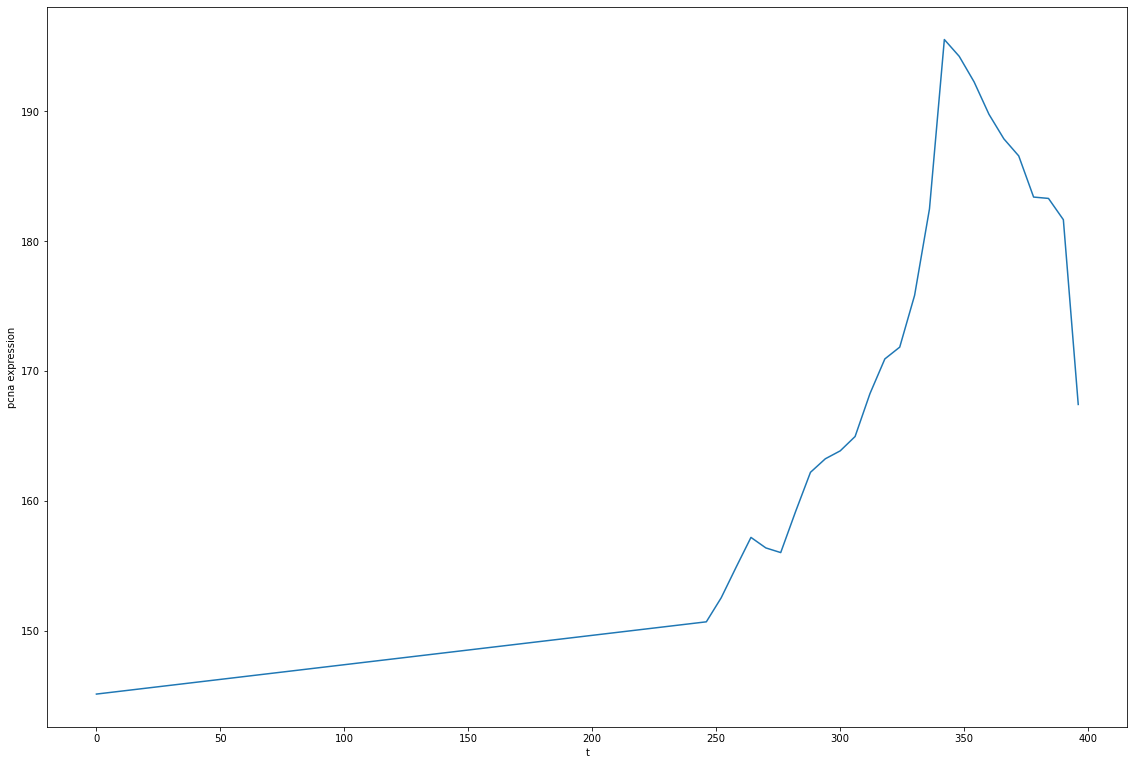

In [84]:
### plot mean intensity for all intact trajectories (cull if needed) ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
for sct_idx in range(len(all_traj_zero_init_time)):
    
    ax.plot(all_traj_zero_init_time[sct_idx],all_traj_pcna_mean_int[sct_idx])
ax.set_ylabel('pcna expression')
ax.set_xlabel('t')
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
plt.show()

quick plot of intensity range

In [76]:
### compute intensity range time series ###
all_traj_zero_init_time = []
all_traj_pcna_int_range = []
for sct_idx in range(len(sct_list)):
        if sct_idx not in banish_traj:
                sct_path = sct_list[sct_idx]
                with open (sct_path, 'rb') as fp:
                        sct = pickle.load(fp)
                sct_zero_init_time = sct.traj_seri[:,0]-np.min(sct.traj_seri[:,0])   # decreases initial time to 0
                sct_int_range = sct.traj_pcna_feature_values[2]
                all_traj_zero_init_time.append(sct_zero_init_time)
                all_traj_pcna_int_range.append(sct_int_range)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


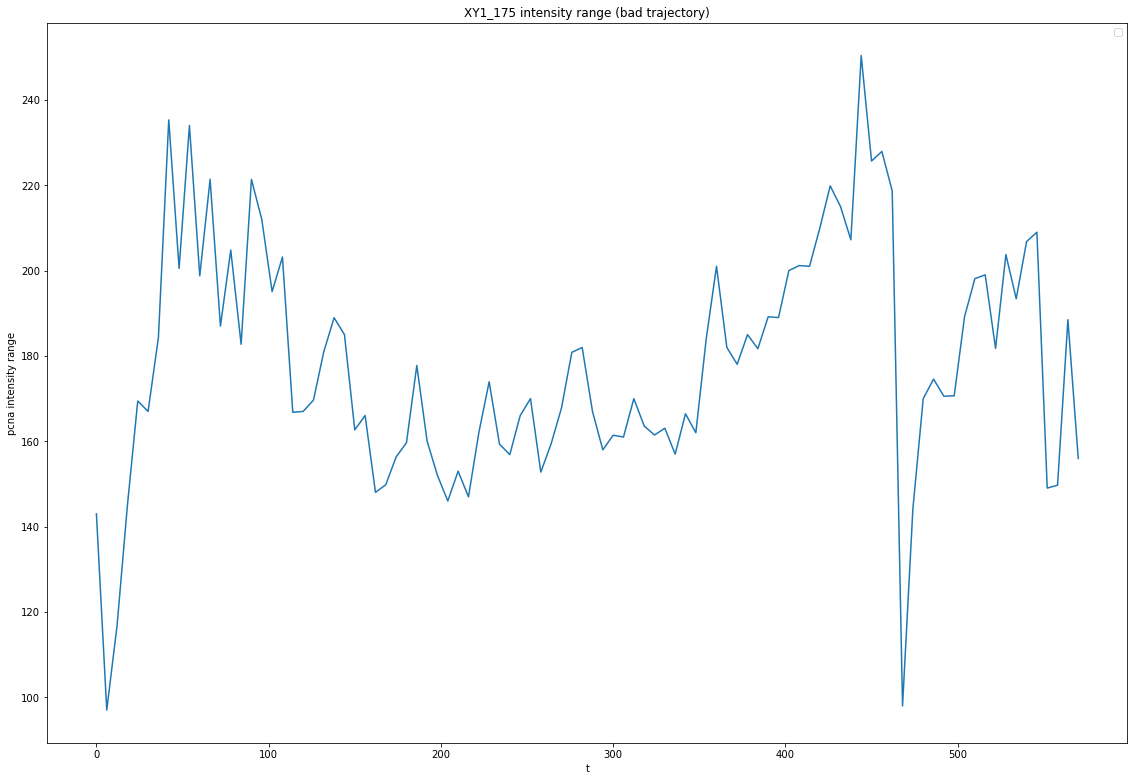

In [77]:
### plot mean intensity for all trajectories (cull if needed) ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
for sct_idx in range(len(all_traj_zero_init_time)):
    ax.plot(all_traj_zero_init_time[sct_idx],all_traj_pcna_int_range[sct_idx])
    ax.set_title('XY1_175 intensity range (bad trajectory)')
ax.legend()
ax.set_ylabel('pcna intensity range')
ax.set_xlabel('t')
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
plt.show()

Save filtered trajectories into ict-remastered

In [78]:
sct_remast_path=output_path+'traj/ict-remastered-02/'
if not os.path.exists(sct_remast_path):
    os.makedirs(sct_remast_path)
for sct_idx in range(len(sct_list)):
        if sct_idx not in banish_traj:
            shutil.copyfile(sct_list[sct_idx],sct_remast_path+basename(sct_list[sct_idx]))